In [240]:
#https://www.kaggle.com/gpreda/covid-world-vaccination-progress

In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize']=(15,12)
pd.set_option('display.max_rows', None)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [242]:
daily = pd.read_csv('worldometer_coronavirus_daily_data.csv')
summary = pd.read_csv('worldometer_coronavirus_summary_data.csv')
vac_by_cty = pd.read_csv('country_vaccinations.csv')

In [243]:
# create an additional column 'pct_death'

summary['pct_death'] = summary['total_deaths']/summary['population']
summary['pct_rec'] = summary['total_recovered']/summary['population']
summary['pct_confirmed'] = summary['total_confirmed']/summary['population']
summary['pct_tests'] = summary['total_tests']/summary['population']
summary.head()

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population,pct_death,pct_rec,pct_confirmed,pct_tests
0,Afghanistan,Asia,88888,3460.0,60598.0,24830.0,1124.0,2236,87.0,520008.0,13081.0,39751424,0.000087,0.001524,0.002236,0.013081
1,Albania,Europe,132437,2453.0,129807.0,177.0,18.0,46068,853.0,752527.0,261764.0,2874828,0.000853,0.045153,0.046068,0.261764
2,Algeria,Africa,132727,3560.0,92384.0,36783.0,25.0,2976,80.0,230861.0,5177.0,44595470,0.000080,0.002072,0.002976,0.005177
3,Andorra,Europe,13813,127.0,13591.0,95.0,3.0,178504,1641.0,193595.0,2501809.0,77382,0.001641,0.175635,0.178504,2.501809
4,Angola,Africa,36455,819.0,30101.0,5535.0,9.0,1078,24.0,596451.0,17634.0,33823498,0.000024,0.000890,0.001078,0.017634


In [244]:
# create an additional column 'pct_vac'

vac_by_cty['pct_vac'] = vac_by_cty['people_fully_vaccinated_per_hundred']/100


vac_by_cty.head(10)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,pct_vac
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/,NaN
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/,NaN
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/,NaN
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/,NaN
5,Afghanistan,AFG,2021-02-27,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/,NaN
6,Afghanistan,AFG,2021-02-28,8200.0,8200.0,NaN,NaN,1367.0,0.02,0.02,NaN,35.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/,NaN
7,Afghanistan,AFG,2021-03-01,NaN,NaN,NaN,NaN,1580.0,NaN,NaN,NaN,41.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/,NaN
8,Afghanistan,AFG,2021-03-02,NaN,NaN,NaN,NaN,1794.0,NaN,NaN,NaN,46.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/,NaN
9,Afghanistan,AFG,2021-03-03,NaN,NaN,NaN,NaN,2008.0,NaN,NaN,NaN,52.0,"BBIBP-CorV, Oxford/AstraZeneca, Pfizer/BioNTech",World Health Organization,https://covid19.who.int/,NaN


In [245]:
# captitalise every first letter in vac_by_cty_list_cty_names

vac_by_cty['country'] = [cap.title() for cap in vac_by_cty['country']]

In [246]:
# rename USA and UK to align with summary

vac_by_cty.replace({'United States':'USA','United Kingdom':'UK'}, inplace=True)
vac_by_cty_list_cty_names =vac_by_cty.country.unique().tolist()
summary_list_cty_names = summary.country.unique().tolist()

In [247]:
# find unique country of these 2 sets of data

unique_cty = list(set(vac_by_cty_list_cty_names)-(set(summary_list_cty_names)))
unique_cty

['Wales',
 'England',
 'Pitcairn',
 'North Macedonia',
 'Brunei',
 'Guernsey',
 'Czechia',
 'Kosovo',
 'Vietnam',
 'Tonga',
 'Bonaire Sint Eustatius And Saba',
 'Guinea-Bissau',
 'Wallis And Futuna',
 'Northern Cyprus',
 'Palestine',
 'Cook Islands',
 'Cape Verde',
 'Sint Maarten (Dutch Part)',
 'Jersey',
 "Cote D'Ivoire",
 'Turkmenistan',
 'Macao',
 'Democratic Republic Of Congo',
 'Northern Ireland',
 'Falkland Islands',
 'Eswatini',
 'Hong Kong',
 'Tuvalu',
 'Timor',
 'Scotland',
 'Nauru']

In [248]:
#remove countries in the unique_cty list for vac_by_cty
add=[]
for i in unique_cty:
    x = vac_by_cty[vac_by_cty.country==i]
    add.append(x)
add = pd.concat(add)

add_idx=[]
for y in add.index:
    add_idx.append(y)
    

In [249]:
# remove these countries for vac_by_cty

vac_by_cty.drop(index= add_idx, inplace=True)

In [250]:
vac_by_cty_list_cty_names =vac_by_cty.country.unique().tolist()
summary_list_cty_names = summary.country.unique().tolist()

In [251]:
# find unique country of these 2 sets of data vice versa

unique_cty_a = list(set(summary_list_cty_names)-(set(vac_by_cty_list_cty_names)))
unique_cty_a

['Brunei Darussalam',
 'Micronesia',
 'Saint Pierre And Miquelon',
 'Eritrea',
 'Burundi',
 'Falkland Islands Malvinas',
 'State Of Palestine',
 'Sint Maarten',
 'Viet Nam',
 'Martinique',
 'Cabo Verde',
 'Guadeloupe',
 'Marshall Islands',
 'China Macao Sar',
 'Swaziland',
 'Wallis And Futuna Islands',
 'Haiti',
 'Reunion',
 'Tanzania',
 'Timor Leste',
 'Guinea Bissau',
 'French Guiana',
 'Saint Martin',
 'Mayotte',
 'Czech Republic',
 'Channel Islands',
 'Cote D Ivoire',
 'Western Sahara',
 'Caribbean Netherlands',
 'Holy See',
 'Saint Barthelemy',
 'Macedonia',
 'China Hong Kong Sar',
 'Democratic Republic Of The Congo']

In [252]:
#remove countries in the unique_cty list for summary

add=[]
for i in unique_cty_a:
    x = summary[summary.country==i]
    add.append(x)
add = pd.concat(add)

add_idx=[]
for y in add.index:
    add_idx.append(y)

In [253]:
# remove these countries for vac_by_cty

summary.drop(index= add_idx, inplace=True)

In [254]:
vac_by_cty_list_cty_names =vac_by_cty.country.unique().tolist()
summary_list_cty_names = summary.country.unique().tolist()

In [255]:
# check for uniqueness

summary.country.describe()

count            186
unique           186
top       Montenegro
freq               1
Name: country, dtype: object

In [256]:
# check for uniqueness

vac_by_cty.country.describe()

count      23912
unique       186
top       Norway
freq         204
Name: country, dtype: object

In [257]:
# replace nan with zero

vac_by_cty.replace({np.nan:0}, inplace=True)

In [258]:
# replace nan with zero

summary.replace({np.nan:0}, inplace=True)

In [259]:
# rename summary.country to summary.country_1

summary.rename(columns={'country':'country_1'}, inplace=True)

In [260]:
pct_vac = vac_by_cty.groupby('country')['pct_vac'].agg(np.sum).reset_index()

In [261]:
#reset index for summary

summary.reset_index(drop=True, inplace=True)

In [262]:
# compute a new dataframe consisting only of country and pct_death and continent

pct_death = summary.loc[:, ['country_1','continent','pct_tests','pct_confirmed','pct_rec','pct_death','total_deaths','population']]

In [263]:
pct_death.shape, pct_vac.shape

((186, 8), (186, 2))

In [264]:
# concatenate the 2 dataframes 

pct_death_vac = pd.concat([pct_vac,pct_death], axis=1)

In [265]:
# drop country_1

del pct_death_vac['country_1']

In [266]:
# review of dataframe after contenation

pct_death_vac.head()

,country,pct_vac,continent,pct_tests,pct_confirmed,pct_rec,pct_death,total_deaths,population
0,Afghanistan,0.0357,Asia,0.013081,0.002236,0.001524,0.000087,3460.0,39751424
1,Albania,3.4607,Europe,0.261764,0.046068,0.045153,0.000853,2453.0,2874828
2,Algeria,0.0000,Africa,0.005177,0.002976,0.002072,0.000080,3560.0,44595470
3,Andorra,1.1898,Europe,2.501809,0.178504,0.175635,0.001641,127.0,77382
4,Angola,0.0919,Africa,0.017634,0.001078,0.000890,0.000024,819.0,33823498


In [267]:
# reorder columns

pct_death_vac=pct_death_vac[['country','continent','pct_tests','pct_vac','pct_confirmed','pct_rec',\
                             'pct_death','total_deaths','population']]

<AxesSubplot:xlabel='continent'>

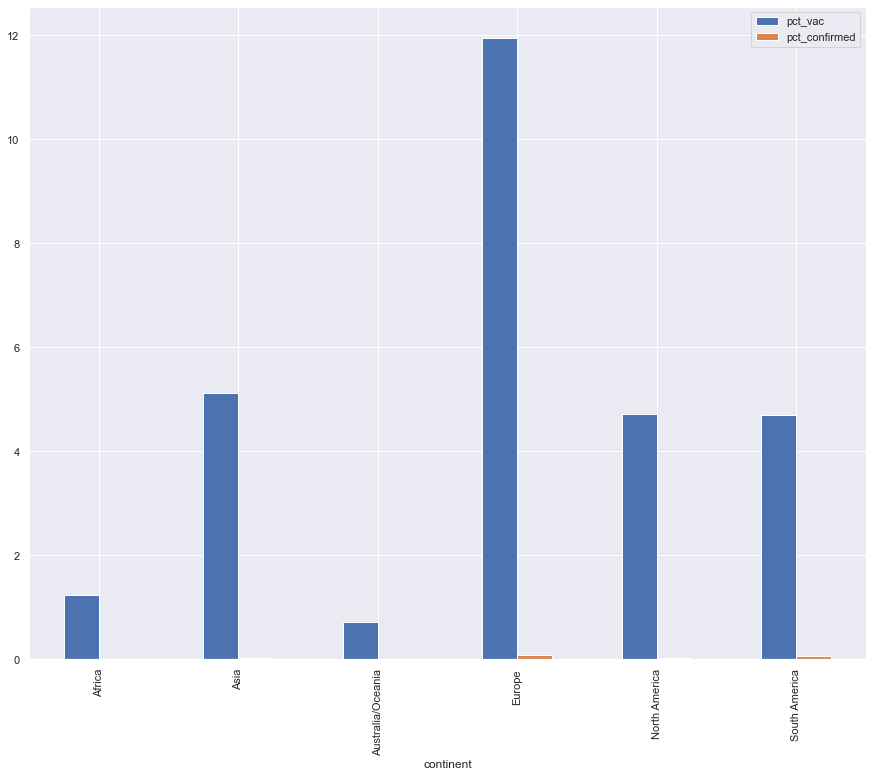

In [268]:
pct_death_vac.groupby('continent')['pct_vac','pct_confirmed'].mean().plot.bar()

### EDA

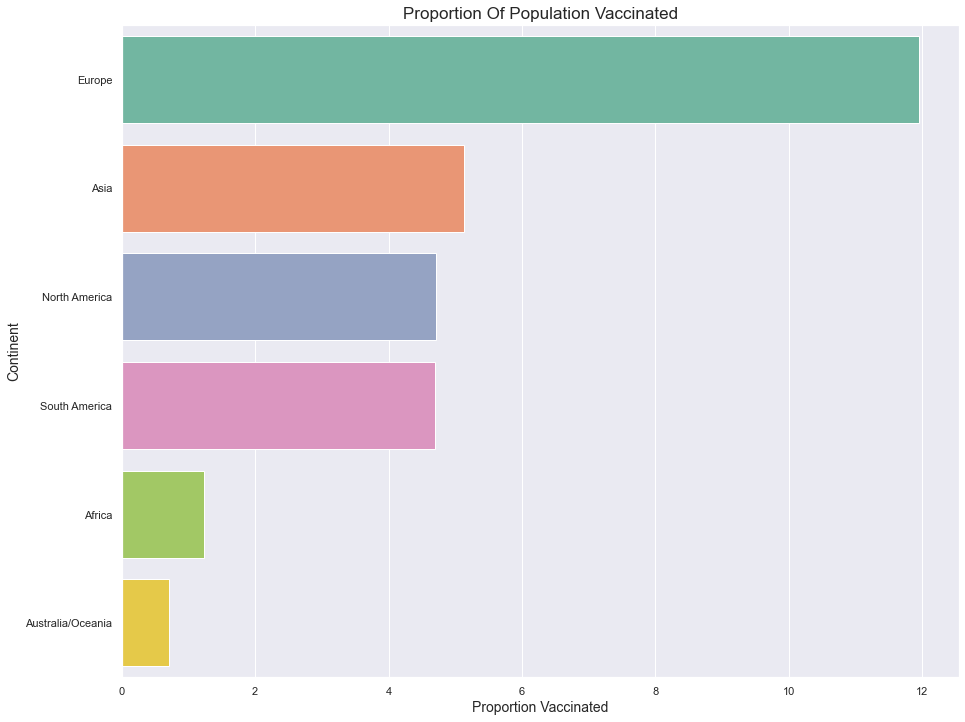

In [269]:
# plot chart to show vaccination rates

order = pct_death_vac.groupby('continent')['pct_vac'].mean().sort_values(ascending=False).index
sns.barplot(data=pct_death_vac, x='pct_vac', y='continent', ci=None, order=order, palette='Set2');
plt.title('Proportion Of Population Vaccinated', fontsize=17);
plt.xlabel('Proportion Vaccinated', fontsize=14);
plt.ylabel('Continent', fontsize=14);

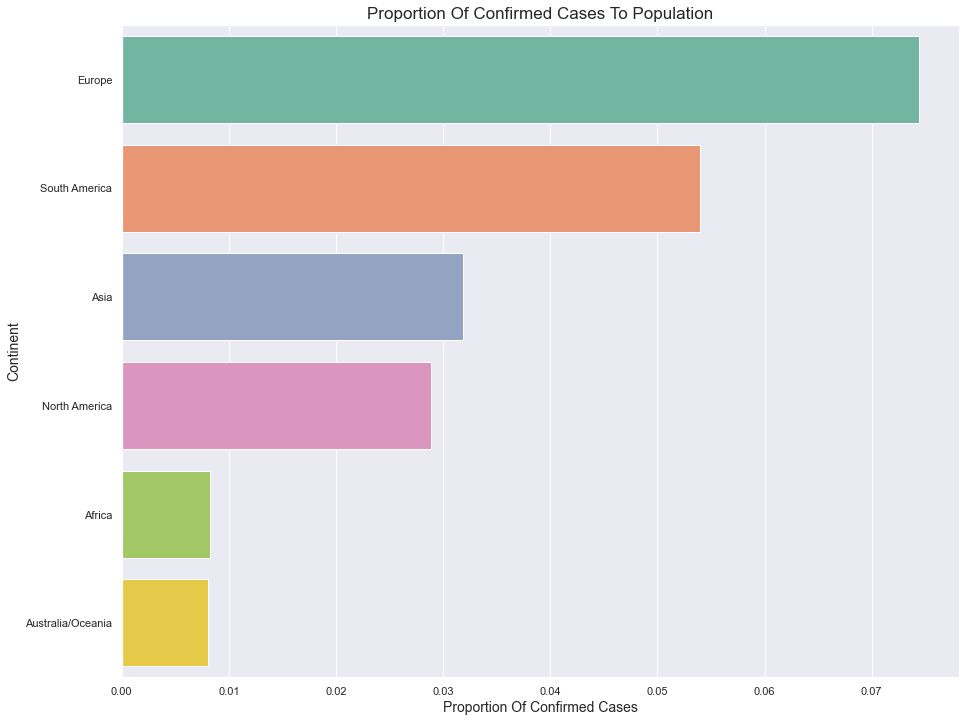

In [270]:
# plot chart to show daily new cases rates

order = pct_death_vac.groupby('continent')['pct_confirmed'].mean().sort_values(ascending=False).index
sns.barplot(data=pct_death_vac, x='pct_confirmed', y='continent', ci=None, order=order, palette='Set2');
plt.title('Proportion Of Confirmed Cases To Population', fontsize=17);
plt.xlabel('Proportion Of Confirmed Cases', fontsize=14);
plt.ylabel('Continent', fontsize=14);

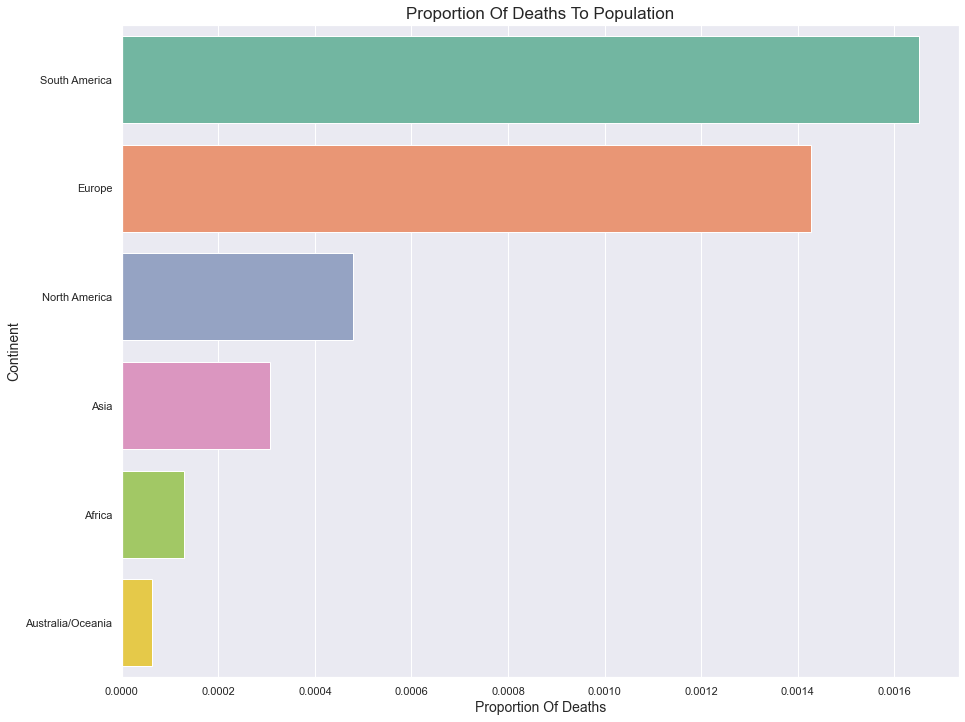

In [271]:
# plot chart to show daily new cases rates

order = pct_death_vac.groupby('continent')['pct_death'].mean().sort_values(ascending=False).index
sns.barplot(data=pct_death_vac, x='pct_death', y='continent', ci=None, order=order, palette='Set2');
plt.title('Proportion Of Deaths To Population', fontsize=17);
plt.xlabel('Proportion Of Deaths', fontsize=14);
plt.ylabel('Continent', fontsize=14);

### Categorizing features into 5 bins

In [272]:
# categorize the values of some 5 columns into 5 bins and assign them to new columns

cat_names = ['pct_vac_cat','pct_confirmed_cat','pct_death_cat','pct_tests_cat','pct_rec_cat','pop_cat']
col_names = ['pct_vac','pct_confirmed','pct_death','pct_tests','pct_rec','population']
num_bins = 5
label_names = np.arange(1,num_bins+1)

for j, k in zip(cat_names, col_names):
    pct_death_vac[j] = pd.qcut(pct_death_vac[k], q=num_bins, labels=label_names)

### Client's requirements and selection of countries for investment

In [321]:
requirement = \
((pct_death_vac['pct_death_cat']>=1) &
(pct_death_vac['pct_confirmed_cat']<=3)&
(pct_death_vac['pop_cat']>=3) &
(pct_death_vac['continent']!='Africa') &
(pct_death_vac['country']!='India'))

In [331]:
# result of requirements according to countries

pct_death_vac[requirement].country.unique()

array(['Afghanistan', 'Australia', 'Bangladesh', 'Cambodia', 'China',
       'Cuba', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Finland',
       'Guatemala', 'Honduras', 'Indonesia', 'Iraq', 'Japan',
       'Kazakhstan', 'Kyrgyzstan', 'Laos', 'Malaysia', 'Mexico',
       'Myanmar', 'Nepal', 'Nicaragua', 'Norway', 'Pakistan',
       'Papua New Guinea', 'Philippines', 'Saudi Arabia', 'Singapore',
       'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan',
       'Thailand', 'Uzbekistan', 'Venezuela', 'Yemen'], dtype=object)

In [332]:
# selection of countries

country_names = pct_death_vac[requirement].country.unique().tolist()
len(country_names)

38

In [333]:
# convert date to datetime format
# convert date to integer for regression 

daily['date_dt'] = pd.to_datetime(daily.date, format='%Y-%m-%d', errors='ignore')
daily['date_int']=[int(i[:4]) for i in daily.date]

In [334]:
# replace nan with zero

daily.replace({np.nan:0}, inplace=True)

In [335]:
# define a function to do regression and plot chart for daily new cases

from scipy import stats
def daily_cases(country):
    _ = daily[daily['country']==country]
    m, b, r, p, se = stats.linregress(_.date_int, _.daily_new_cases_sc)
    sns.lineplot(data=_, x='date_int', y='daily_new_cases_sc', ci=None)
    #plt.title(f"{m:.0f} Daily New Cases In {country}", fontsize=17)
    plt.title('Daily New Cases',fontsize=19)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Number Of Cases', fontsize=14)

In [336]:
# define a function to do regression and plot chart 

from scipy import stats
def daily_deaths(country):
    _ = daily[daily['country']==country]
    m, b, r, p, se = stats.linregress(_.date_int, _.daily_new_deaths)
    X_min = _.date_int.min()
    X_max = _.date_int.max()
    func = lambda x: m*x + b
    X = np.array([X_min,X_max])
    y = np.array([func(X_min), func(X_max)])
    #plt.plot(X,y)
    sns.lineplot(data=_, x='date_int', y='daily_new_deaths')
    plt.title(f"{m:.0f} Daily New Deaths In {country}", fontsize=17)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Number Of Deaths', fontsize=14)
    #print(f"There are {m:.0f} daily deaths in {country}")

In [337]:
# compute daily new cases trend for the chosen countries by linear regression coefficient


acc=[]
for country in country_names:
    _ = daily[daily['country']==country]
    m, b, r, p, se = stats.linregress(_.date_int, _.daily_new_cases)
    cast = {'Country':country, 'Daily New Cases':round(m,1)}
    acc.append(cast)
cty_daily_new_cases = pd.DataFrame(data=acc, columns=['Country','Daily New Cases'])

,Country,Daily New Cases
25,Papua New Guinea,95.4
32,Taiwan,69.8
0,Afghanistan,60.9
31,Syria,46.7
8,El Salvador,38.3
37,Yemen,22.8
17,Laos,11.8
22,Nicaragua,-8.9
33,Tajikistan,-41.3
1,Australia,-77.2


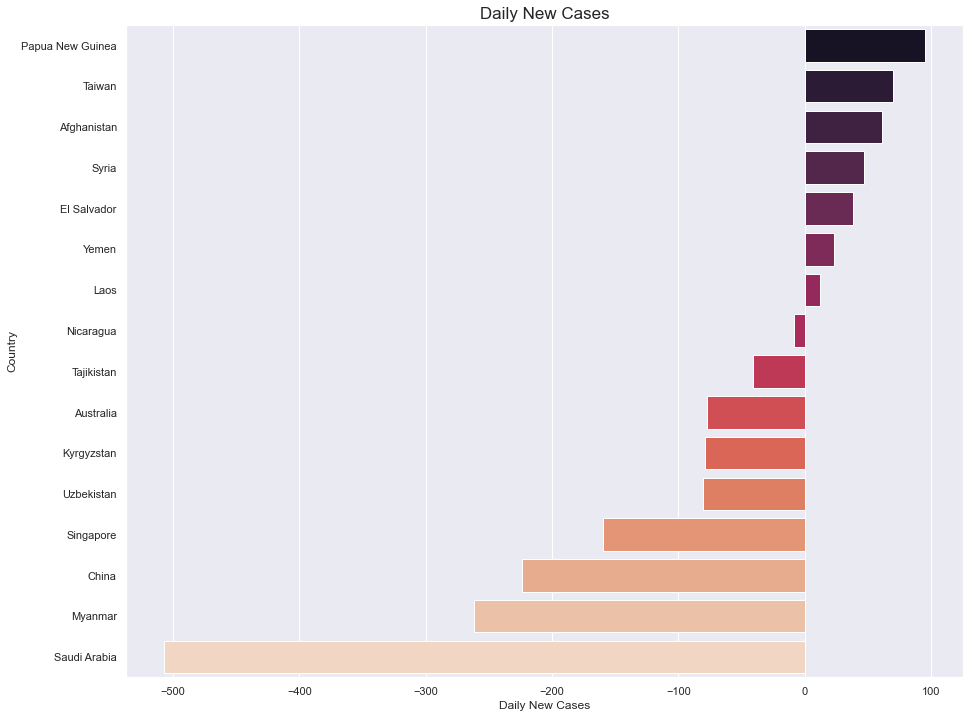

In [338]:
# eliminate countries where new daily cases are >199

cty_daily_new_cases = cty_daily_new_cases[cty_daily_new_cases['Daily New Cases']<200]
cty_daily_new_cases.sort_values('Daily New Cases', ascending=False, inplace=True)


# plot daily new cases for the chosen countries (coefficient)

order = cty_daily_new_cases.Country
sns.barplot(data=cty_daily_new_cases, x='Daily New Cases', y='Country', palette='rocket', order=order);
plt.title('Daily New Cases', fontsize=17);
#cty_daily_new_cases.sort_values('Daily New Cases', ascending=False, inplace=True)

cty_daily_new_cases


In [339]:
# compute daily new deaths for the chosen countries


acc=[]
for country in country_names:
    _ = daily[daily['country']==country]
    m, b, r, p, se = stats.linregress(_.date_int, _.daily_new_deaths)
    cast = {'Country':country, 'Daily New Deaths':round(m,1)}
    acc.append(cast)
cty_daily_new_deaths = pd.DataFrame(data=acc, columns=['Country','Daily New Deaths'])

,Country,Daily New Deaths
0,Afghanistan,0.9
25,Papua New Guinea,0.9
23,Norway,0.8
9,Finland,0.7
6,Dominican Republic,0.4
17,Laos,0.0
28,Singapore,-0.1
33,Tajikistan,-0.3
22,Nicaragua,-0.4
7,Ecuador,-0.7


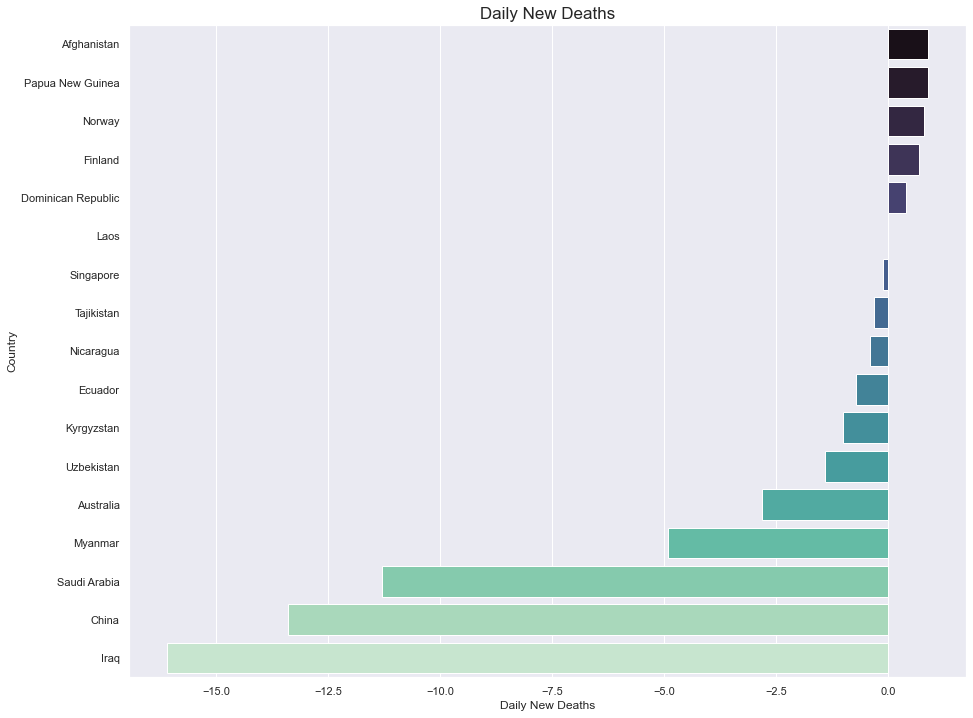

In [340]:
# eliminate countries where daily new deaths are > 8

cty_daily_new_deaths = cty_daily_new_deaths[cty_daily_new_deaths['Daily New Deaths']< 1]
cty_daily_new_deaths.sort_values('Daily New Deaths', ascending=False, inplace=True)


# plot daily new deaths for the chosen countries

order = cty_daily_new_deaths.Country
sns.barplot(data=cty_daily_new_deaths, x='Daily New Deaths', y='Country', palette='mako', order=order);
plt.title('Daily New Deaths', fontsize=17);

cty_daily_new_deaths


In [359]:
# define a function to do regression and plot chart 

from scipy import stats
def daily_deaths(country):
    _ = daily[daily['country']==country]
    m, b, r, p, se = stats.linregress(_.date_int, _.daily_new_deaths)
    X_min = _.date_int.min()
    X_max = _.date_int.max()
    func = lambda x: m*x + b
    X = np.array([X_min,X_max])
    y = np.array([func(X_min), func(X_max)])
    plt.plot(X,y)
    #sns.lineplot(data=_, x='date_int', y='daily_new_deaths')
    #plt.title(f"{m:.0f} Daily New Deaths In {country}", fontsize=17)
    plt.title('Daily New Deaths', fontsize=22)
    plt.xlabel('Year', fontsize=19)
    plt.ylabel('Number Of Deaths', fontsize=17)

In [360]:
# define a function to do regression and plot chart 

from scipy import stats
def daily_cases(country):
    _ = daily[daily['country']==country]
    m, b, r, p, se = stats.linregress(_.date_int, _.daily_new_cases)
    X_min = _.date_int.min()
    X_max = _.date_int.max()
    func = lambda x: m*x + b
    X = np.array([X_min,X_max])
    y = np.array([func(X_min), func(X_max)])
    plt.plot(X,y)
    #sns.lineplot(data=_, x='date_int', y='daily_new_deaths')
    #plt.title(f"{m:.0f} Daily New Deaths In {country}", fontsize=17)
    plt.title('Daily New Cases', fontsize=22)
    plt.xlabel('Year', fontsize=19)
    plt.ylabel('Number Of Cases', fontsize=17)

In [361]:
cty_daily_new_cases.Country

25    Papua New Guinea
32              Taiwan
0          Afghanistan
31               Syria
8          El Salvador
37               Yemen
17                Laos
22           Nicaragua
33          Tajikistan
1            Australia
16          Kyrgyzstan
35          Uzbekistan
28           Singapore
4                China
20             Myanmar
27        Saudi Arabia
Name: Country, dtype: object

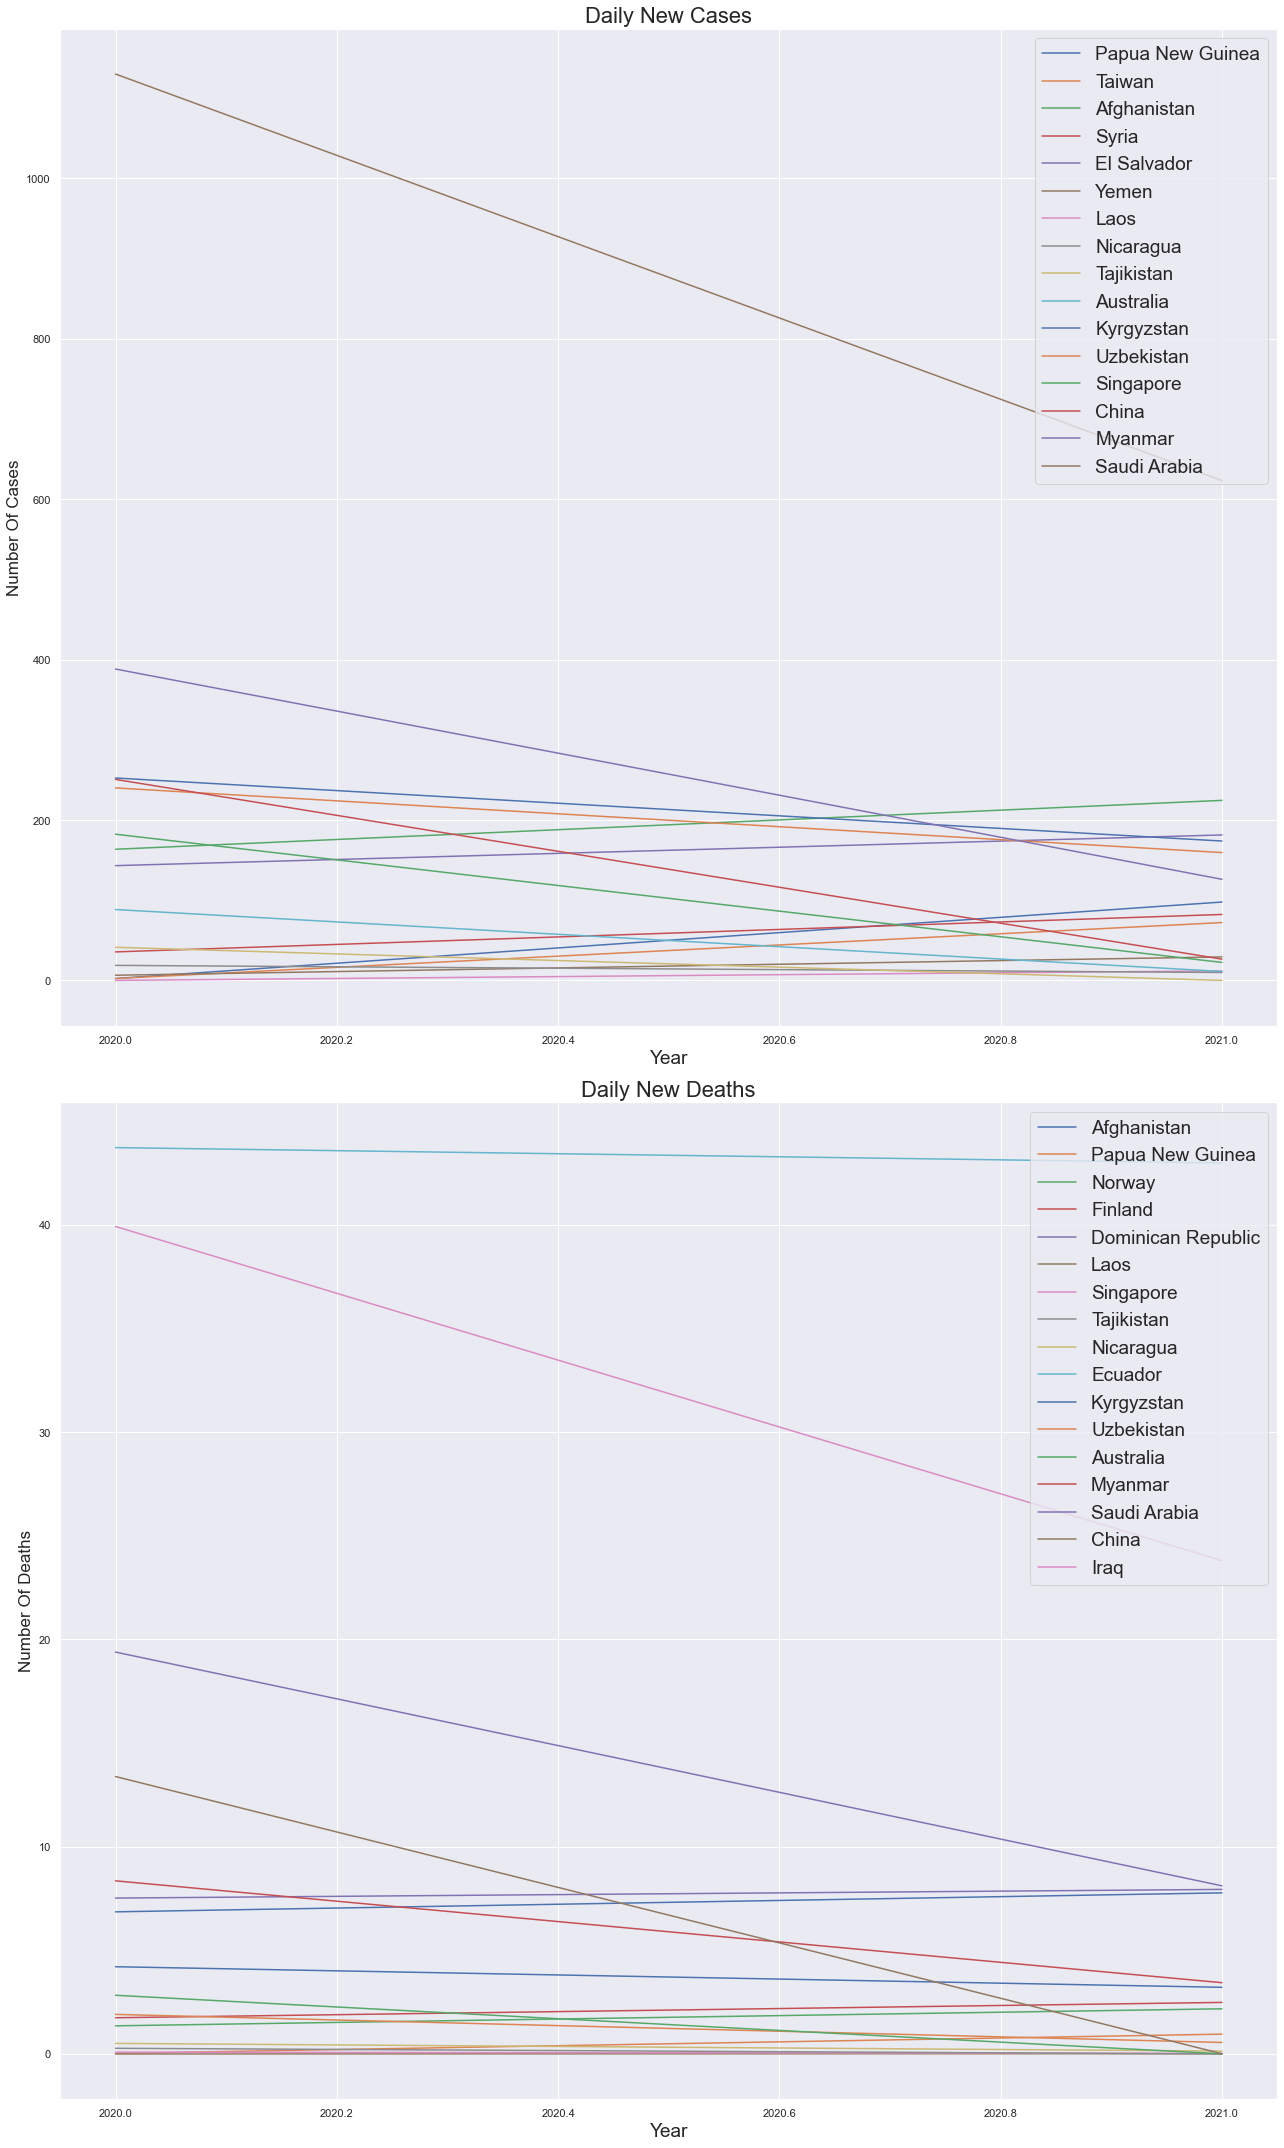

In [367]:
# plot out linear regression for these countries for new daily cases and daily deaths


fig=plt.gcf()
fig.set_size_inches(18,30)


for country in cty_daily_new_cases.Country:
    plt.subplot(2,1,1)
    daily_cases(country)
    plt.legend(cty_daily_new_cases.Country, fontsize=19, loc='upper right')
    plt.tight_layout()
    
for country in cty_daily_new_deaths.Country:    
    plt.subplot(2,1,2)
    daily_deaths(country)
    plt.legend(cty_daily_new_deaths.Country, fontsize=19,loc='upper right')
    plt.tight_layout()
    

In [369]:
# combining the 2 lists together

new_death_cases = list(set(cty_daily_new_cases.Country) | set(cty_daily_new_deaths.Country))
new_death_cases

['Tajikistan',
 'Syria',
 'Dominican Republic',
 'Ecuador',
 'Norway',
 'Taiwan',
 'Australia',
 'Laos',
 'Kyrgyzstan',
 'Papua New Guinea',
 'Iraq',
 'Myanmar',
 'El Salvador',
 'Finland',
 'Nicaragua',
 'Singapore',
 'Saudi Arabia',
 'Afghanistan',
 'Uzbekistan',
 'China',
 'Yemen']

In [370]:
# create new dataframe base on combined list of countries

shortlisted_countries = []
for i in new_death_cases:
    shortlisted_countries.append(pct_death_vac[pct_death_vac['country']==i])
shortlisted_countries = pd.concat(shortlisted_countries)

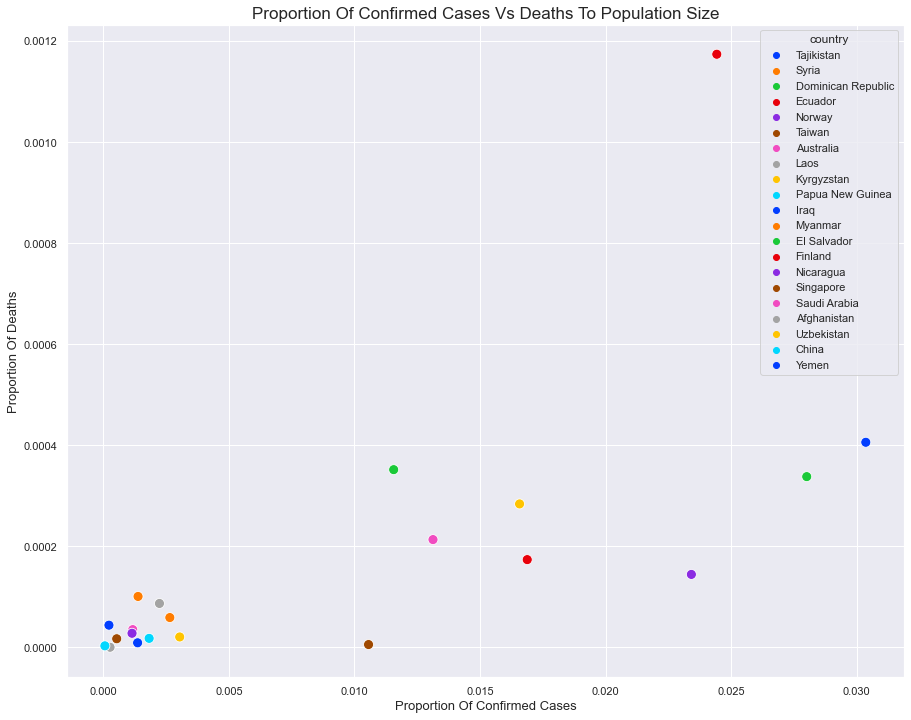

In [371]:
sns.scatterplot(data = shortlisted_countries, x='pct_confirmed',y='pct_death', hue='country', palette='bright', s=100);
plt.title('Proportion Of Confirmed Cases Vs Deaths To Population Size', fontsize=17);
plt.xlabel('Proportion Of Confirmed Cases', fontsize=13);
plt.ylabel('Proportion Of Deaths', fontsize=13);

In [377]:
shortlisted_countries.head()

,country,continent,pct_tests,pct_vac,pct_confirmed,pct_rec,pct_death,total_deaths,population,pct_vac_cat,pct_confirmed_cat,pct_death_cat,pct_tests_cat,pct_rec_cat,pop_cat
167,Tajikistan,Asia,0.000000,0.0057,0.001366,0.001357,9.241416e-06,90.0,9738767,1,1,1,1,1,3
165,Syria,Asia,0.005786,0.0003,0.001384,0.001210,1.008963e-04,1806.0,17899562,1,1,2,1,1,4
166,Taiwan,Asia,0.050181,0.0061,0.000534,0.000047,1.722730e-05,411.0,23857483,1,1,1,2,1,4
10,Australia,Australia/Oceania,0.746937,0.7580,0.001173,0.001132,3.530064e-05,910.0,25778568,3,1,2,4,1,4
91,Laos,Asia,0.036378,1.2762,0.000268,0.000248,4.067841e-07,3.0,7374920,3,1,1,1,1,3


In [374]:
requirement = (shortlisted_countries['pct_confirmed']<0.011) & (shortlisted_countries['pct_death']<0.016)

In [375]:
# further shortlisting the countries to deaths < 0.00015

shortlisted_countries = shortlisted_countries[requirement]

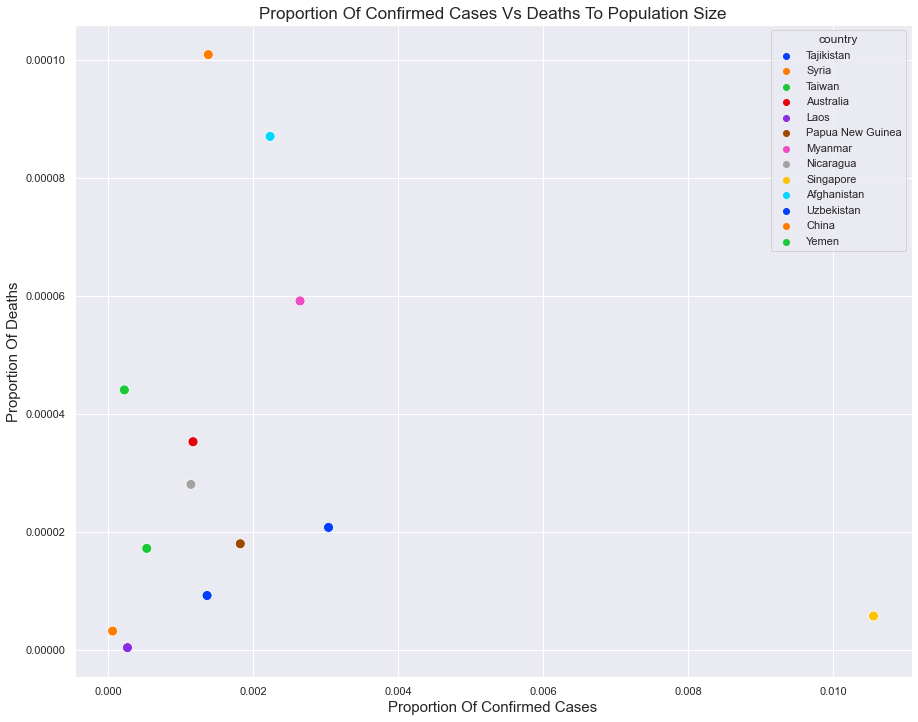

In [378]:
# plot again (confirmed list!)

sns.scatterplot(data = shortlisted_countries, x='pct_confirmed',y='pct_death', hue='country', palette='bright', s=100);
plt.title('Proportion Of Confirmed Cases Vs Deaths To Population Size', fontsize=17);
plt.xlabel('Proportion Of Confirmed Cases', fontsize=15);
plt.ylabel('Proportion Of Deaths', fontsize=15);

In [197]:
short = shortlisted_countries.loc[:,['country','pct_confirmed','pct_rec','pct_death']]

In [198]:
short

,country,pct_confirmed,pct_rec,pct_death
167,Tajikistan,0.001366,0.001357,9.241416e-06
165,Syria,0.001384,0.001210,1.008963e-04
49,Dominican Republic,0.028008,0.022797,3.378866e-04
125,Norway,0.023415,0.016288,1.444734e-04
166,Taiwan,0.000534,0.000047,1.722730e-05
10,Australia,0.001173,0.001132,3.530064e-05
91,Laos,0.000268,0.000248,4.067841e-07
90,Kyrgyzstan,0.016574,0.015443,2.839058e-04
129,Papua New Guinea,0.001825,0.001751,1.800948e-05
79,Iraq,0.030359,0.028344,4.058447e-04


In [199]:
short = pd.melt(short, id_vars='country')

In [200]:
short = short.sort_values('country')

In [201]:
short

,country,variable,value
16,Afghanistan,pct_confirmed,2.236096e-03
56,Afghanistan,pct_death,8.704091e-05
36,Afghanistan,pct_rec,1.524423e-03
25,Australia,pct_rec,1.132297e-03
45,Australia,pct_death,3.530064e-05
5,Australia,pct_confirmed,1.172835e-03
58,China,pct_death,3.220957e-06
18,China,pct_confirmed,6.349787e-05
38,China,pct_rec,5.996705e-05
42,Dominican Republic,pct_death,3.378866e-04


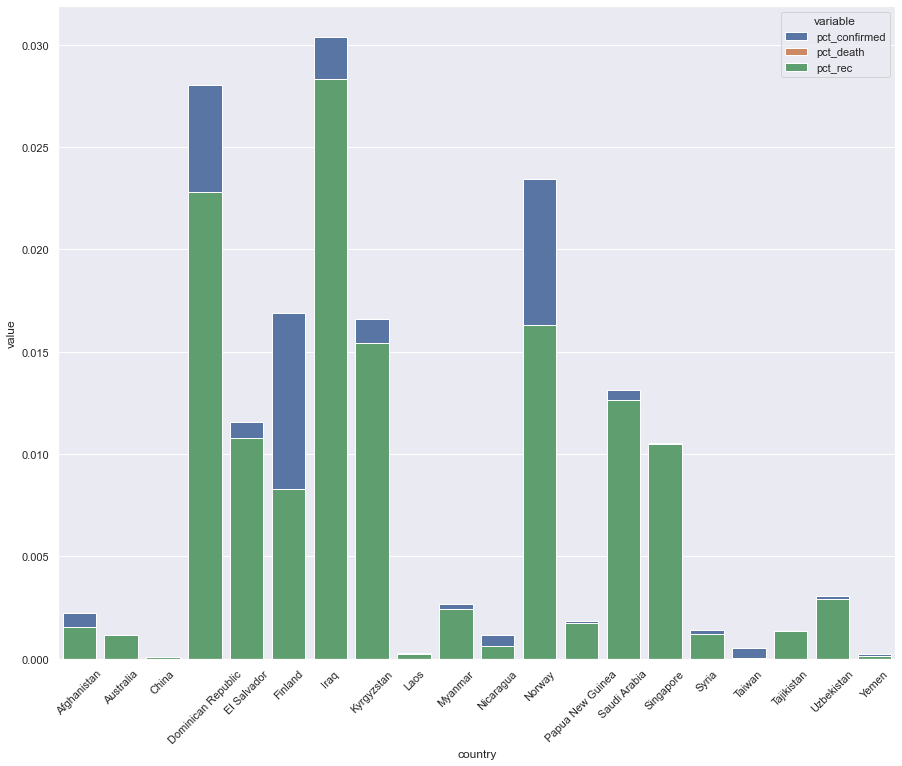

In [205]:

order = 
sns.barplot(data=short, x='country', y='value', hue='variable', dodge=False);
plt.xticks(rotation=45);

In [84]:
shortlisted_countries

,country,continent,pct_tests,pct_vac,pct_confirmed,pct_rec,pct_death,total_deaths,population,pct_vac_cat,pct_confirmed_cat,pct_death_cat,pct_tests_cat,pct_rec_cat,pop_cat
10,Australia,Australia/Oceania,0.746937,0.7580,0.001173,0.001132,0.000035,910.0,25778568,3,1,2,4,1,4
37,China,Asia,0.111163,0.1551,0.000063,0.000060,0.000003,4636.0,1439323776,2,1,1,2,1,5
85,Japan,Asia,0.120908,1.3975,0.006105,0.005719,0.000110,13907.0,126110418,3,2,2,2,2,5
157,South Korea,Asia,0.197629,1.9173,0.002873,0.002690,0.000039,1982.0,51310862,3,2,2,3,2,5
166,Taiwan,Asia,0.050181,0.0061,0.000534,0.000047,0.000017,411.0,23857483,1,1,1,2,1,4
160,Sri Lanka,Asia,0.169012,0.8837,0.010183,0.008563,0.000096,2073.0,21497986,3,2,2,3,2,4
168,Thailand,Asia,0.116127,0.9419,0.002760,0.002148,0.000020,1431.0,69965349,3,2,1,2,2,5
151,Singapore,Asia,2.098316,2.9755,0.010561,0.010486,0.000006,34.0,5893725,4,2,1,5,3,3
127,Pakistan,Asia,0.061273,0.2121,0.004179,0.003893,0.000096,21633.0,224922985,2,2,2,2,2,5
129,Papua New Guinea,Australia/Oceania,0.013828,0.0000,0.001825,0.001751,0.000018,164.0,9106314,1,1,1,1,2,3


In [225]:
short_1 = shortlisted_countries.loc[:,['country','pct_tests','pct_vac','pct_confirmed','pct_death']]

In [226]:
short_1

,country,pct_tests,pct_vac,pct_confirmed,pct_death
167,Tajikistan,0.000000,0.0057,0.001366,9.241416e-06
165,Syria,0.005786,0.0003,0.001384,1.008963e-04
125,Norway,1.070717,13.0950,0.023415,1.444734e-04
166,Taiwan,0.050181,0.0061,0.000534,1.722730e-05
10,Australia,0.746937,0.7580,0.001173,3.530064e-05
91,Laos,0.036378,1.2762,0.000268,4.067841e-07
129,Papua New Guinea,0.013828,0.0000,0.001825,1.800948e-05
116,Myanmar,0.048251,0.0444,0.002649,5.915568e-05
122,Nicaragua,0.000000,0.0000,0.001144,2.806479e-05
151,Singapore,2.098316,2.9755,0.010561,5.768847e-06


In [227]:
short_1 = pd.melt(short_1, id_vars='country')

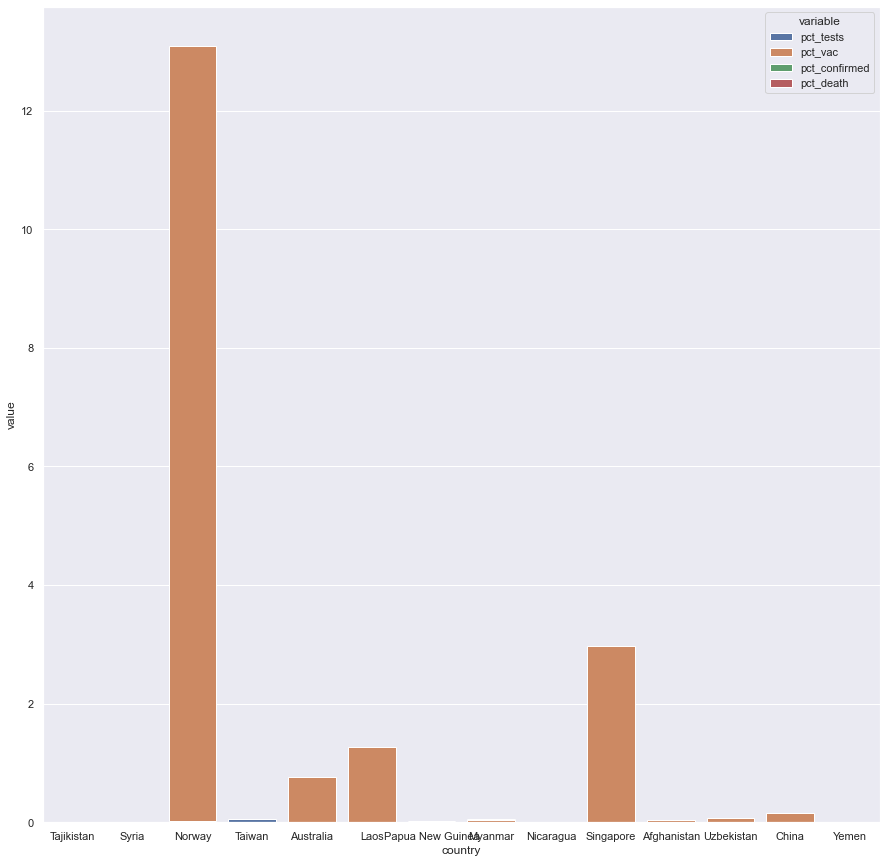

In [229]:

fig, ax = plt.subplots(figsize=(15,15))
sns.barplot(data=short_1, x='country', y='value', hue='variable', dodge=False);